<div><h1>Домашнее задание
по дисциплине «Методы машинного обучения»</h1>
<div><h2>Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. </h2>
  <div>Домашнее задание включает выполнение следующих шагов:

<div>1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
<div>2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
<div>3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
<div>4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
<div>5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
<div>6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
<div>7.Формирование обучающей и тестовой выборок на основе исходного набора данных.
 <div>8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
<div>9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
<div>10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
<div>11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Загрузка данных

In [0]:
df  = pd.read_csv("heart.csv", sep=",")
df .head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


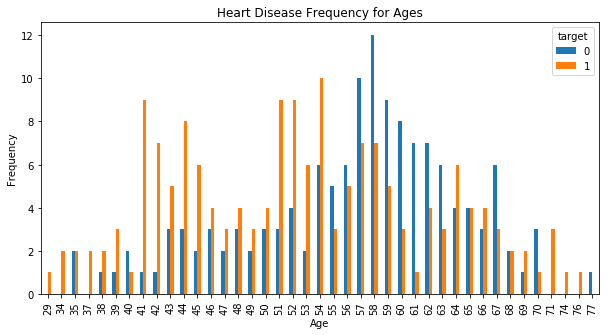

In [0]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

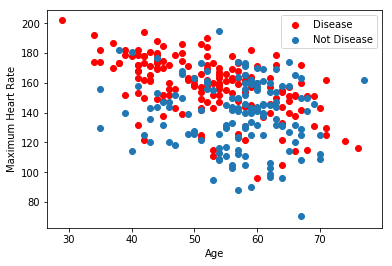

In [0]:




plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

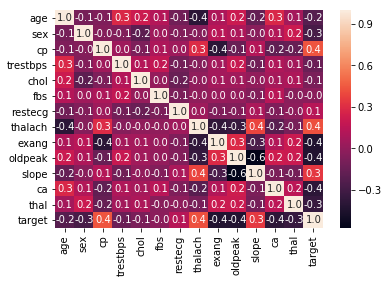

In [0]:
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1f')

1. Заметим что oldpeak (снижение ST, вызванная физической нагрузкой, относительно отдыха)
наклон пика сегмента ST при физической нагрузке относительно сильно коррелируют - уберем oldpeak.
2. Уровень холестерина (chol),результаты электрокардиографии в покое(restecg)  и сахара в крови (fbs) слабо коррелированны относительно остальных признаков - уберем оба

In [0]:
df=df.drop(['chol','fbs','oldpeak','restecg'], axis = 1)

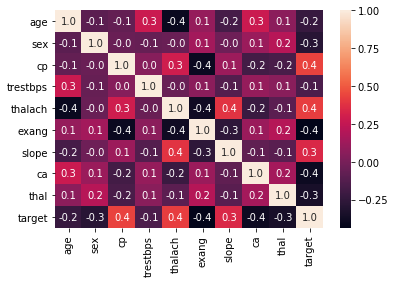

In [0]:











sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.1f')

In [0]:



for col in df.columns:
  temp=df[df[col].isnull()].shape[0]
  print('{}-{}'.format(col, temp))
print("----------------------")
df.dtypes

age-0
sex-0
cp-0
trestbps-0
thalach-0
exang-0
slope-0
ca-0
thal-0
target-0
----------------------


age         int64
sex         int64
cp          int64
trestbps    int64
thalach     int64
exang       int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

Заметим что датасет не содержит категориальных признаков и пропусков

In [0]:
Y = df.drop(df.columns[[0,1,2,3,4,5,6,7,8]],axis="columns")
X = df.drop(df.columns[[9]],axis="columns")

### Выбор метрик
Для оценки качества моделей будем использовать следующие метрики:
-Средняя абсолютная ошибка 
-Каппа Коэна

In [0]:
from sklearn.metrics import mean_absolute_error, cohen_kappa_score

### Выбор моделей
В качестве моделей возьмем линейную модель стохастического спуска, дерево решений и ансамблевый метод повышения градиента


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Разделение выборки на обучающую и тестовую

In [0]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

### Построение базового решения без подбора гиперпараметров

In [0]:
class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.tar1 = []
    self.tar2 = []
  def training(self):
    self._method.fit(self.x_train,self.y_train)
    self.tar2 = self._method.predict(self.x_test)
  def result(self,metric):
    print(metric(self.y_test,self.tar2)*100)

SGD -  реализует регуляризованные линейные модели с обучением по случайному градиентному спуску (SGD): градиент потерь оценивается для каждой выборки за раз, и модель обновляется по мере уменьшения  скорости обучения.

In [0]:
#Линейные модели
sgdlinear = Classifier(SGDClassifier(),data_x_train,data_y_train,data_x_test,data_y_test)
sgdlinear.training()
sgdlinear.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)

32.78688524590164
___________________________________
34.68950749464669
___________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Модель, которая прогнозирует значение целевой переменной путем изучения простых правил принятия решений, выведенных из функций данных.

Например, в приведенном ниже примере деревья решений учатся на основе данных для аппроксимации синусоиды с набором правил принятия решений if-then-else. Чем глубже дерево, тем сложнее правила принятия решений и тем лучше модель.

In [0]:
dtc = Classifier(DecisionTreeClassifier(random_state=5),data_x_train,data_y_train,data_x_test,data_y_test)
dtc.training()
dtc.result(mean_absolute_error)
dtc.result(cohen_kappa_score)

22.950819672131146
___________________________________
53.98706896551724
___________________________________


In [0]:
gbc=Classifier(GradientBoostingClassifier(max_features=2),data_x_train,data_y_train,data_x_test,data_y_test)
gbc.training()
gbc.result(mean_absolute_error)
gbc.result(cohen_kappa_score)

21.311475409836063
___________________________________
57.296715131933226
___________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Подбор гиперпараметра К

In [0]:
n_range = np.array(range(5,95,10))
n_range = n_range/100
tp=[{'l1_ratio':n_range}]

[{'l1_ratio': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])}]

In [0]:
lgscv = GridSearchCV(SGDClassifier(),tp,scoring='accuracy')
lgscv.fit(data_x_train,data_y_train)

In [0]:
bp1=lgscv.best_params_['l1_ratio']
bp1

0.35

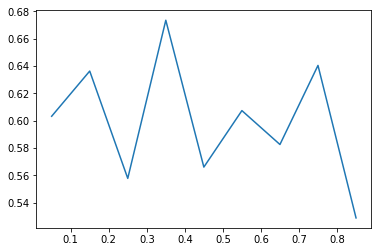

In [0]:













plt.plot(n_range,lgscv.cv_results_['mean_test_score'])

In [0]:
n_range = np.array(range(1,10,1))
tp=[{'max_depth':n_range}]

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [0]:
tgscv = GridSearchCV(DecisionTreeClassifier(random_state=1),tp,cv=5,scoring='accuracy')
tgscv.fit(data_x_train,data_y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train

In [0]:
bp2=tgscv.best_params_['max_depth']
bp2

3

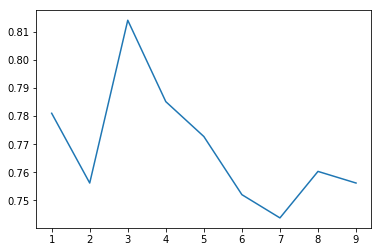

In [0]:







plt.plot(n_range,tgscv.cv_results_['mean_test_score'])

In [0]:
n_range = np.array(range(1,11,1))
n_range = n_range/10
tp=[{'max_features':n_range}]

[{'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [0]:
gbcgscv = GridSearchCV(GradientBoostingClassifier(),tp,cv=5,scoring='accuracy')
gbcgscv.fit(data_x_train,data_y_train)

In [0]:
bp3=gbcgscv.best_params_['max_features']
bp3

0.1

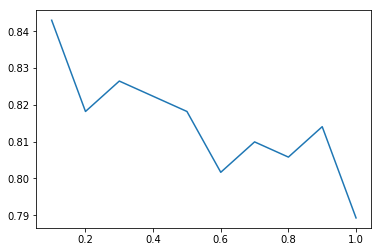

In [0]:
plt.plot(n_range,gbcgscv.cv_results_['mean_test_score'])

### Сравнение моделей

In [0]:
#Линейные модели
sgdlinear.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)
print("___________________________________")
sgdlinear2 = Classifier(SGDClassifier(l1_ratio=bp1),data_x_train,data_y_train,data_x_test,data_y_test)
sgdlinear2.training()
sgdlinear2.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)

32.78688524590164
34.68950749464669
___________________________________
44.26229508196721
34.68950749464669


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#DTC
dtc.result(mean_absolute_error)
dtc.result(cohen_kappa_score)
print("___________________________________")
dtc2 = Classifier(DecisionTreeClassifier(random_state=bp2),data_x_train,data_y_train,data_x_test,data_y_test)
dtc2.training()
dtc2.result(mean_absolute_error)
dtc2.result(cohen_kappa_score)


22.950819672131146
53.98706896551724
___________________________________
24.59016393442623
50.726978998384496


In [0]:
gbc.result(mean_absolute_error)
gbc.result(cohen_kappa_score)
print("vs")
gbc2=Classifier(GradientBoostingClassifier(max_features=bp3),data_x_train,data_y_train,data_x_test,data_y_test)
gbc2.training()
gbc2.result(mean_absolute_error)
gbc2.result(cohen_kappa_score)

21.311475409836063
57.296715131933226
vs
19.672131147540984
60.517799352750814


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Выводы:
<div>По полученным моделям и значениям можно сделать следующие выводы:

<div> 1. Наилучшим методом оказался ансамблевский GradiendBoosting показав средние ~60%
<div> 2. Несмотря на визуально незначительный прирост после использования расчитанных гиперпараметров использовать случайные гиперпараметры не рекоммендуется.
  


### Литература
<div> 1. Heart Disease UCI: https://www.kaggle.com/ronitf/heart-disease-uci
<div> 2. Scikit-learn docs: https://scikit-learn.org/stable/modules/